In [ ]:
Project Title:
Infant Mortality Rate Analysis in Pakistan (1970–2020)
                                            
📁 Dataset Source:
The dataset contains various health and demographic indicators, including Infant Mortality Rate in Pakistan from 1970 to 2020.
It was obtained from a global or national health database (likely WHO or UNICEF), provided in CSV format.

📊 Initial Columns Overview:
Column Name	        Description
Year	            The year in which the data was recorded
Sex	                Gender category: 'Male', 'Female', 'Both sexes', etc.
Value	            Infant mortality rate (per 1000 live births)
Other columns	    Various irrelevant dimensions (age groups, education etc.)

Initial Observations:
======================
The dataset contained many non-numeric or irrelevant entries in Sex, Year, and other columns.
The Value column, which represented the target variable, had some missing/null values.
The Sex column contained unwanted categories like "Unknown", "Total", and others unrelated to gender.

🧹 Data Cleaning Steps:
============================
Dropped Irrelevant Columns
Columns unrelated to the analysis objective were removed (e.g., Age, Education, etc.).
Dropped Missing or Invalid Value Entries
All rows with missing values in the target variable (Value) were removed.
Filtered Relevant Sex Categories
Retained only rows where Sex is:
'Male'
'Female'
'Both sexes'
All other values like 'Unknown', 'Total', 'Q2', etc., were removed.
Filtered Valid Years
Retained rows where Year is a valid 4-digit number (e.g., 1970, 1985, etc.).
Label Encoding
Categorical Sex column was label encoded:

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# Import the necessary widget for file upload
# Prompt the user to upload a file
data = "F:\\STEMETA_Intership_Projects\\HealthIndicator\\health_indicators_pak.csv"  # Replace with the actual file path or use a file upload widget in a notebook environment

# Read the uploaded file into a pandas DataFrame
# ( the uploaded file is a CSV)
data = pd.read_csv(data)
# Display the first few rows of the DataFrame
data.head()

,GHO (CODE),GHO (DISPLAY),GHO (URL),YEAR (DISPLAY),STARTYEAR,ENDYEAR,REGION (CODE),REGION (DISPLAY),COUNTRY (CODE),COUNTRY (DISPLAY),DIMENSION (TYPE),DIMENSION (CODE),DIMENSION (NAME),Numeric,Value,Low,High
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MDG_0000000001,Infant mortality rate (probability of dying be...,https://www.who.int/data/gho/data/indicators/i...,1978.0,1978.0,1978.0,EMR,Eastern Mediterranean,PAK,Pakistan,SEX,SEX_BTSX,Both sexes,128.629383,128.6 [121.3-136.4],121.298609,136.434514
2,CM_02,Number of infant deaths,https://www.who.int/data/gho/data/indicators/i...,1970.0,1970.0,1970.0,EMR,Eastern Mediterranean,PAK,Pakistan,SEX,SEX_FMLE,Female,162243.000000,162 243 [150 180-175 188],150180.000000,175188.000000
3,CM_02,Number of infant deaths,https://www.who.int/data/gho/data/indicators/i...,1968.0,1968.0,1968.0,EMR,Eastern Mediterranean,PAK,Pakistan,SEX,SEX_BTSX,Both sexes,341398.000000,341 398 [316 125-367 516],316125.000000,367516.000000
4,CM_01,Number of under-five deaths,https://www.who.int/data/gho/data/indicators/i...,1994.0,1994.0,1994.0,EMR,Eastern Mediterranean,PAK,Pakistan,SEX,SEX_BTSX,Both sexes,159104.000000,159 104 [142 595-177 120],142595.000000,177120.000000


In [79]:
# Display basic info
print("=== Dataset Info ===")
print(data.info())
print("\n=== First 5 Rows ===")
print(data.head())

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22418 entries, 0 to 22417
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GHO (CODE)         22417 non-null  object 
 1   GHO (DISPLAY)      22417 non-null  object 
 2   GHO (URL)          22417 non-null  object 
 3   YEAR (DISPLAY)     22417 non-null  float64
 4   STARTYEAR          22417 non-null  float64
 5   ENDYEAR            22417 non-null  float64
 6   REGION (CODE)      22417 non-null  object 
 7   REGION (DISPLAY)   22417 non-null  object 
 8   COUNTRY (CODE)     22417 non-null  object 
 9   COUNTRY (DISPLAY)  22417 non-null  object 
 10  DIMENSION (TYPE)   19008 non-null  object 
 11  DIMENSION (CODE)   19008 non-null  object 
 12  DIMENSION (NAME)   18964 non-null  object 
 13  Numeric            20225 non-null  float64
 14  Value              22348 non-null  object 
 15  Low                14440 non-null  float64
 16  H

In [80]:
# Check for null/missing values
print("\n=== Null Values ===")
print(data.isnull().sum())


=== Null Values ===
GHO (CODE)              1
GHO (DISPLAY)           1
GHO (URL)               1
YEAR (DISPLAY)          1
STARTYEAR               1
ENDYEAR                 1
REGION (CODE)           1
REGION (DISPLAY)        1
COUNTRY (CODE)          1
COUNTRY (DISPLAY)       1
DIMENSION (TYPE)     3410
DIMENSION (CODE)     3410
DIMENSION (NAME)     3454
Numeric              2193
Value                  70
Low                  7978
High                 7978
dtype: int64


"Keeping those rows would have caused errors or incorrect results in graphs and summaries, so it's a standard data cleaning step."
We dropped rows where 'Value' or 'Numeric' was missing because these columns contain the main numerical data we are analyzing. If these values are missing, the row can't be used for any meaningfu analysis, visualization, or modeling — so we removed them to ensure data quality.


In [81]:
#Drop rows where 'Value' or 'Numeric' is missing
data.dropna(subset=['Value', 'Numeric'], inplace=True)


"These dimension columns provide extra information like gender or age group. When this information is missing, instead of dropping the row — which might still have important data — we fill it with 'Unknown'. This way, we preserve the useful data while clearly marking that some dimension info is not available."
If we drop these rows, we could lose valid data points just because a small piece of extra info was missing. So, to avoid losing valuable data, we fill the missing dimension values with a neutral label 'Unknown'."

In [82]:
# Fill nulls in dimension columns with 'Unknown' (optional)
data['DIMENSION (TYPE)'] = data['DIMENSION (TYPE)'].fillna('Unknown')
data['DIMENSION (CODE)'] = data['DIMENSION (CODE)'].fillna('Unknown')
data['DIMENSION (NAME)'] = data['DIMENSION (NAME)'].fillna('Unknown')

most of the values in 'Low' and 'High' were missing (about 8000 nulls), so they were not useful for basic analysis and only added noise."
"The 'Low' and 'High' columns represent the confidence interval range for the main value. Since we are not analyzing statistical uncertainty or doing advanced modeling, these columns are not needed. So, we dropped them to simplify the dataset and reduce unnecessary columns.

In [83]:
# Drop 'Low' and 'High' columns if not needed
data.drop(columns=['Low', 'High'], inplace=True)

In [84]:
# Reset index after dropping
data.reset_index(drop=True, inplace=True)

In [85]:
# Final check
print("\n=== After Cleaning Nulls ===")
print(data.isnull().sum())
print("\nCleaned Data Sample:")
data.head()


=== After Cleaning Nulls ===
GHO (CODE)           0
GHO (DISPLAY)        0
GHO (URL)            0
YEAR (DISPLAY)       0
STARTYEAR            0
ENDYEAR              0
REGION (CODE)        0
REGION (DISPLAY)     0
COUNTRY (CODE)       0
COUNTRY (DISPLAY)    0
DIMENSION (TYPE)     0
DIMENSION (CODE)     0
DIMENSION (NAME)     0
Numeric              0
Value                0
dtype: int64

Cleaned Data Sample:


,GHO (CODE),GHO (DISPLAY),GHO (URL),YEAR (DISPLAY),STARTYEAR,ENDYEAR,REGION (CODE),REGION (DISPLAY),COUNTRY (CODE),COUNTRY (DISPLAY),DIMENSION (TYPE),DIMENSION (CODE),DIMENSION (NAME),Numeric,Value
0,MDG_0000000001,Infant mortality rate (probability of dying be...,https://www.who.int/data/gho/data/indicators/i...,1978.0,1978.0,1978.0,EMR,Eastern Mediterranean,PAK,Pakistan,SEX,SEX_BTSX,Both sexes,128.629383,128.6 [121.3-136.4]
1,CM_02,Number of infant deaths,https://www.who.int/data/gho/data/indicators/i...,1970.0,1970.0,1970.0,EMR,Eastern Mediterranean,PAK,Pakistan,SEX,SEX_FMLE,Female,162243.000000,162 243 [150 180-175 188]
2,CM_02,Number of infant deaths,https://www.who.int/data/gho/data/indicators/i...,1968.0,1968.0,1968.0,EMR,Eastern Mediterranean,PAK,Pakistan,SEX,SEX_BTSX,Both sexes,341398.000000,341 398 [316 125-367 516]
3,CM_01,Number of under-five deaths,https://www.who.int/data/gho/data/indicators/i...,1994.0,1994.0,1994.0,EMR,Eastern Mediterranean,PAK,Pakistan,SEX,SEX_BTSX,Both sexes,159104.000000,159 104 [142 595-177 120]
4,FINPROTECTION_CATA_TOT_10_POP,Population with household spending on health g...,https://www.who.int/data/gho/data/indicators/i...,2010.0,2010.0,2010.0,EMR,Eastern Mediterranean,PAK,Pakistan,SEX,SEX_FMLE,Female,3.250000,3.25


| Column Name                          | Kya karein? | Reason                                                                                                                                             |
| ------------------------------------ | ----------- | -------------------------------------------------------------------------------------------------------------------------------------------------- |
| `GHO (CODE)`                         | ❌ **Drop**  | Yeh WHO internal code hota hai, analysis mein kaam ka nahi.                                                                                        |
| `GHO (DISPLAY)`                      | ❌ **Drop**  | Har row mein same value hoti hai: “Infant mortality rate (probability of dying between birth and age 1 per 1000 live births)”. Duplicate info hai. |
| `GHO (URL)`                          | ❌ **Drop**  | Sirf reference link hai, model ya graph mein use nahi hota.                                                                                        |
| `STARTYEAR` / `ENDYEAR`              | ❌ **Drop**  | Ye bhi `YEAR (DISPLAY)` ka duplicate type hain. Har row ka start-end same year hoga.                                                               |
| `REGION (CODE)` / `REGION (DISPLAY)` | ❌ **Drop**  | Har row mein same region hai: “Eastern Mediterranean” (Pakistan ka WHO region). No variation.                                                      |
| `COUNTRY (CODE)`                     | ❌ **Drop**  | Har row mein same code hoga (PAK), already have `COUNTRY (DISPLAY)`                                                                                |
| `COUNTRY (DISPLAY)`                  | ⚠️ Optional | Agar multiple countries hote to useful hota. Lekin agar sirf Pakistan hai to drop kar sakte ho.                                                    |
| `DIMENSION (TYPE)`                   | ❌ **Drop**  | Iska value mostly same hoga e.g., “Sex”, already included in `DIMENSION (NAME)`                                                                    |
| `DIMENSION (CODE)`                   | ❌ **Drop**  | Gender ka code hai (e.g. `SEX_BTSX`), but `DIMENSION (NAME)` is human-readable. Better for charts.                                                 |
| `Value`                              | ❌ **Drop**  | Duplicate of `Numeric`, ya string version. Tum already `Numeric` use kar rahe ho for analysis.                                                     |


In [86]:
# Rename columns for clarity
# (optional) Rename columns to more user-friendly names
data.rename(columns={
    'YEAR (DISPLAY)': 'Year',
    'DIMENSION (NAME)': 'Sex',
    'Numeric': 'Infant_Mortality'
}, inplace=True)
data.columns  # Display updated column names

Index(['GHO (CODE)', 'GHO (DISPLAY)', 'GHO (URL)', 'Year', 'STARTYEAR',
       'ENDYEAR', 'REGION (CODE)', 'REGION (DISPLAY)', 'COUNTRY (CODE)',
       'COUNTRY (DISPLAY)', 'DIMENSION (TYPE)', 'DIMENSION (CODE)', 'Sex',
       'Infant_Mortality', 'Value'],
      dtype='object')

In [110]:
from sklearn.preprocessing import LabelEncoder

# Keep relevant columns (additionally encoded columns)
data = data[['Year', 'Sex', 'Infant_Mortality', 'REGION (DISPLAY)', 'COUNTRY (DISPLAY)', 'DIMENSION (TYPE)']]

# Drop missing values
data = data.dropna()

# Step 4: Encode categorical features
label_encoders = {}
for col in ['Sex', 'REGION (DISPLAY)', 'COUNTRY (DISPLAY)', 'DIMENSION (TYPE)']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Convert into numerics
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Infant_Mortality'] = pd.to_numeric(data['Infant_Mortality'], errors='coerce')
data = data.dropna()

# ✅ Apply log transformation to the target variable
data['Infant_Mortality'] = np.log1p(data['Infant_Mortality'])

# Display the cleaned dataset
print("\n=== Cleaned Dataset ===")
print(data.head())


=== Cleaned Dataset ===
     Year  Sex  Infant_Mortality  REGION (DISPLAY)  COUNTRY (DISPLAY)  \
0  1978.0   39          4.864679                 0                  0   
1  1970.0   43         11.996857                 0                  0   
2  1968.0   39         12.740807                 0                  0   
3  1994.0   39         11.977320                 0                  0   
4  2010.0   43          1.446919                 0                  0   

   DIMENSION (TYPE)  
0                12  
1                12  
2                12  
3                12  
4                12  


In [111]:
# Independent variables
x = data.drop('Infant_Mortality', axis=1)

# Dependent variable
y = data['Infant_Mortality']
print("\n=== Dependent Variable Null Values ===")
print(y.isnull().sum())

print("\n=== Independent Variables ===")
print(x.isnull().sum())
print(x.head())


=== Dependent Variable Null Values ===
0

=== Independent Variables ===
Year                 0
Sex                  0
REGION (DISPLAY)     0
COUNTRY (DISPLAY)    0
DIMENSION (TYPE)     0
dtype: int64
     Year  Sex  REGION (DISPLAY)  COUNTRY (DISPLAY)  DIMENSION (TYPE)
0  1978.0   39                 0                  0                12
1  1970.0   43                 0                  0                12
2  1968.0   39                 0                  0                12
3  1994.0   39                 0                  0                12
4  2010.0   43                 0                  0                12


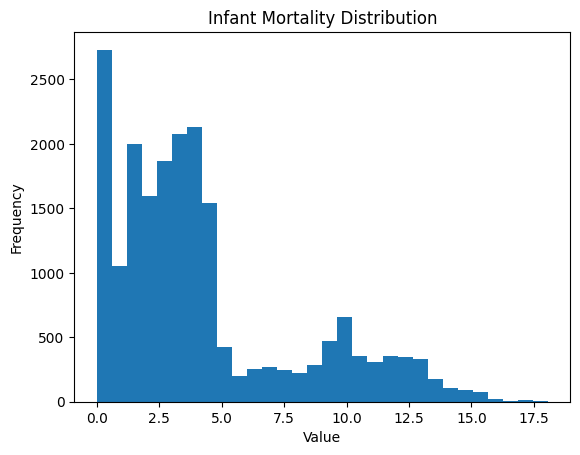

In [112]:
import matplotlib.pyplot as plt
plt.hist(data['Infant_Mortality'], bins=30)
plt.title("Infant Mortality Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [114]:

# Model
model = LinearRegression()
model.fit(x_train, y_train)  # Train the model with training data

LinearRegression()

In [120]:
#  Predict
y_pred = model.predict(x_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [121]:
# Print results
print("=== Linear Regression Model Performance ===")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score (Accuracy):", r2)

=== Linear Regression Model Performance ===
Mean Squared Error (MSE): 10.529335691087256
Root Mean Squared Error (RMSE): 3.2448937873353043
R² Score (Accuracy): 0.24996751518932359


In [115]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)


In [116]:
# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 10.847692763037317
R² Score: 0.22729009728404448


In [117]:
import xgboost as xgb
# 6. XGBoost Model banayein aur train karein
model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Regression ke liye
    n_estimators=100,              # Darakhto ki tadad
    learning_rate=0.1,             # Seekhne ki raftaar
    max_depth=3,                   # Darakht ki gehrai
    random_state=42
)
model.fit(x_train, y_train)  # Train the model with training data

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [118]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_pred = model.predict(x_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print("=== XGBoost Model Performance ===")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


=== XGBoost Model Performance ===
Mean Squared Error (MSE): 10.529335691087256
Root Mean Squared Error (RMSE): 3.2448937873353043
R² Score: 0.24996751518932359


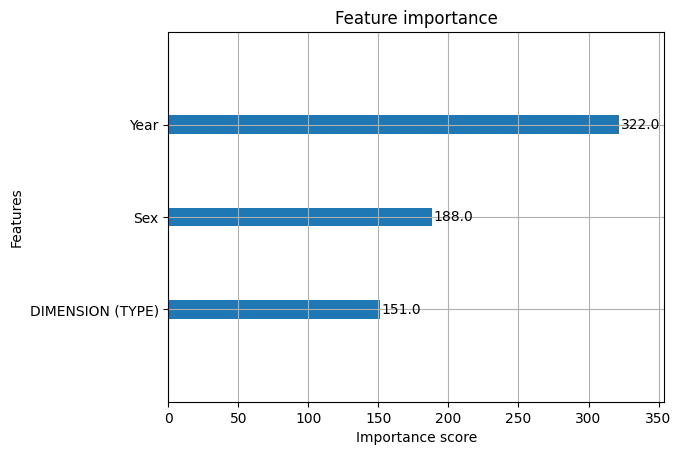

In [119]:
xgb.plot_importance(model)
plt.show()
